In [25]:
# Use normalization for clustering, data must be normal
import numpy as np, pandas as pd, scipy, matplotlib.pyplot as plt, seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
from sklearn.cluster import MiniBatchKMeans
%matplotlib inline

In [26]:
# UC Irvine ML Repo on Heart Disease
df = pd.read_csv("https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/master/cleveland.csv", header=None, error_bad_lines=False)

# Define features and outcome
X = df.iloc[:, :13]
y = df.iloc[:, 13]

# Replace missing values
X = X.replace(to_replace='?', value=0)

# Binarize y
y = np.where(y > 0, 0, 1)

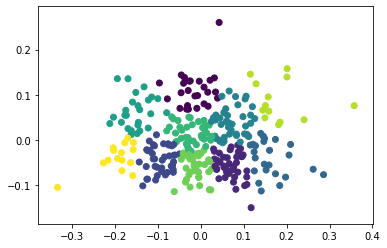

col_0   0   1
row_0        
0      15  11
1       7  34
2      15  24
3       4  20
4      23  20
5      20   6
6      23  18
7      14  21
8       7   6
9      11   4


In [27]:
# KMeans
# Normalize the data for PCA (2 components)
X_norm = normalize(X)
X_pca = PCA(2).fit_transform(X_norm)

# Create predictions and plot solution
y_pred = KMeans(n_clusters=10, random_state=42).fit_predict(X_pca)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred)
plt.show()

# Check solution against data
print(pd.crosstab(y_pred,y))

In [28]:
# Using MiniBatch KMeans
# Each batch contains 200 samples
minibatchkmeans = MiniBatchKMeans(
    init='random',
    n_clusters=50,
    batch_size=5000)
minibatchkmeans.fit(X_pca)

# Add the new predicted cluster memberships to the dataframe
predict_mini = minibatchkmeans.predict(X_pca)

# Check relative accuracy
print(pd.crosstab(predict_mini, y_pred))

col_0  0   1  2  3   4  5  6  7  8  9
row_0                                
0      2   0  0  0   0  3  0  0  0  0
1      0   0  6  0   0  0  2  0  0  0
2      0   0  4  0   0  0  0  0  0  0
3      0   0  4  0   0  0  0  3  0  0
4      0   0  0  0   0  2  0  0  0  0
5      0   0  0  9   0  0  0  0  0  0
6      0   0  0  0   0  0  0  0  5  0
7      0   3  0  0   0  0  0  5  0  0
8      0   0  0  0   0  0  0  5  0  0
9      4   0  0  0   1  0  0  0  0  0
10     0   0  0  9   3  0  0  0  0  0
11     0   0  0  2   0  0  0  0  0  0
12     0   0  1  0   0  0  0  0  0  3
13     0   0  0  0   0  0  0  0  0  6
14     0   0  0  0   0  0  0  4  0  0
15     0   1  0  0   9  0  0  0  0  0
16     0   0  0  0   0  0  0  7  0  0
17     0   0  0  0   5  0  0  0  1  0
18     0   9  0  0   0  0  0  0  0  0
19     0  15  0  0   0  0  0  0  0  0
20     0   0  0  0   0  0  7  0  0  0
21     0   0  4  0   0  0  0  0  0  0
22     0   7  0  1   0  0  0  0  0  0
23     2   0  0  0   0  0  0  0  0  0
24     0   0